<a href="https://colab.research.google.com/github/kibr0/uaspsd/blob/master/uaspsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import urllib
import scipy.io.wavfile
import pydub

mp3 = pydub.AudioSegment.from_mp3("goawaym.mp3")
#convert to wav
mp3.export("file.wav", format="wav")
#read wav file
rate,audData=scipy.io.wavfile.read("file.wav")

print(rate)
print(audData)

48000
[[    0     0]
 [    0     0]
 [    0     0]
 ...
 [16803 19960]
 [19694 22783]
 [17254 19550]]


In [90]:
#wav length
audData.shape[0] / rate

30.0

In [0]:
#wav number of channels mono/stereo
audData.shape[1]
#if stereo grab both channels
channel1=audData[:,0] #left
channel2=audData[:,1] #right

In [98]:
audData.dtype

dtype('int16')

In [0]:
import numpy as np
#averaging the channels damages the music
mono=np.sum(audData.astype(float), axis=1)/2
scipy.io.wavfile.write("file2.wav", rate, mono)

Text(0, 0.5, 'Amplitude')

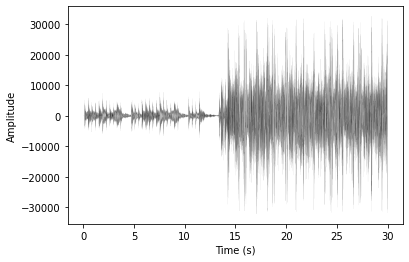

In [116]:
import matplotlib.pyplot as plt

#create a time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1) / rate

#plot amplitude (or loudness) over time
plt.figure(1)
plt.title("")
plt.plot(time, channel1, linewidth=0.03, color='black')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')



Text(0, 0.5, 'Amplitude')

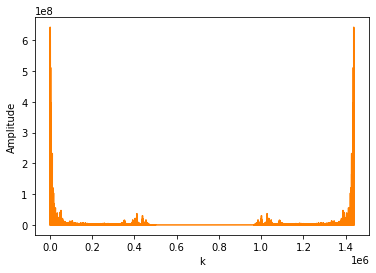

In [128]:
from numpy import fft as fft

fourier=abs(fft.fft(channel1))

plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


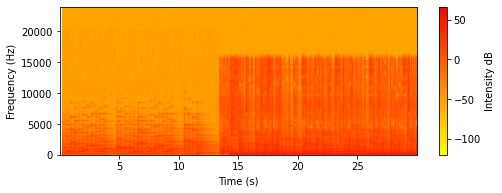

In [131]:
plt.figure(2, figsize=(8,6))
plt.subplot(211)
Pxx, freqs, bins, im = plt.specgram(channel1, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')

Text(0, 0.5, 'Frequency (Hz)')

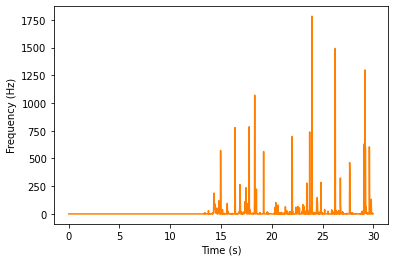

In [139]:
np.where(freqs==10034.47265625)
MHZ10=Pxx[233,:]
plt.plot(bins, MHZ10, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')